In [7]:
# Importing the necessary functions
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop

from keras.backend import eval

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading in the  MNIST Data set
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Reshaping data set
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)#

# Dividing each picture by their pixels
x_train = x_train/255
x_test = x_test/255
# Converting values to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Representing categorical variables as binary vectors
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [3]:
# Printing details of the dataset
print("Shape of Training set: ", x_train.shape)
print ("Shape of Test set: ", x_test.shape)
# Displaying the number of unique classes
classes = np.unique(y_train)
numClasses = len(classes)
print('Total number of classes: ', numClasses)
print('Output classes : ', classes)

Shape of Training set:  (60000, 28, 28, 1)
Shape of Test set:  (10000, 28, 28, 1)
Total number of classes:  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
# Making the model sequential as it's a Convolutional Neural Network
model = Sequential()
# Convolutional Layer which uses 6 neurons with a 3x3 filter matrix, taking in a input image of 28 x 28 pixels 
model.add(Conv2D(6, (3,3), input_shape= (28,28,1)))
model.add(Activation('relu')) # Using rectified linear activation
model.add(MaxPooling2D(pool_size=(2,2))) # Adding a max pooling layer
model.add(BatchNormalization()) # Bath normalization

# Hidden Convolutional Layer follows as above but takes in 16 neurons and applies a MaxPooling layer and Batch Normalization
model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

#Another Hidden Convolutional Layer which uses 120 neurons and applies a MaxPooling Layer and Batch Normalization
model.add(Conv2D(120, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

#Flattens and denses model in to 1 dimension and uses the rectified linear activation
model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu')) 
# Final output layer which applies a softmax activation
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
# Compiling the model with the RMSprop optimizer and using the metric accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])
# Training the model with the a batch size of 64 using 5 epochs
model.fit(x_train,y_train_one_hot, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 45s 750us/step - loss: 0.1713 - acc: 0.9486
Epoch 2/5
60000/60000 [==============================] - 44s 734us/step - loss: 0.0724 - acc: 0.9776
Epoch 3/5
60000/60000 [==============================] - 44s 736us/step - loss: 0.0541 - acc: 0.9831
Epoch 4/5
60000/60000 [==============================] - 45s 756us/step - loss: 0.0414 - acc: 0.9864
Epoch 5/5
60000/60000 [==============================] - 44s 730us/step - loss: 0.0360 - acc: 0.9884


In [8]:
# Outputting the accuracy and error loss of our model
loss,accuracy = model.evaluate(x_test, y_test_one_hot)
print("Accuracy: ", accuracy)
print ("Loss: ", loss)
# Outputting the learning rate of our model
lrate = eval(model.optimizer.lr)
print("Learning Rate: ", lrate)

10000/10000 [==============================] - 4s 383us/step
Accuracy:  0.9843
Loss:  0.06169644869852054
Learning Rate:  0.001


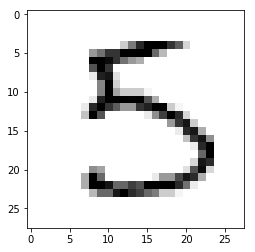

In [9]:
#Displaying an image from out test data set
plt.imshow(x_test[15].reshape(28,28), cmap = plt.cm.binary)
plt.show()

In [10]:
# Predicting what number the image is using our model
prediction = model.predict(x_test)
print(np.argmax(np.round(prediction[15])))

5


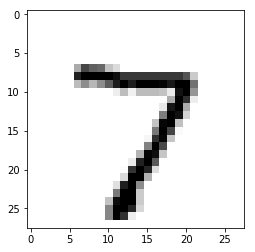

In [11]:
#Displaying an image from out test data set
plt.imshow(x_test[0].reshape(28,28), cmap = plt.cm.binary)
plt.show()

In [12]:
# Predicting what number the image is using our model
prediction = model.predict(x_test)
print(np.argmax(np.round(prediction[0])))

7
